<a href="https://colab.research.google.com/github/rakshitha-sathyakumar/twitter-COVID-19-analysis/blob/master/sentiment-analysis/Sentiment_Analysis_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 4.6MB/s 


In [2]:
import pandas as pd
import numpy as np

In [3]:
import nltk


import re
nltk.download('stopwords')
from nltk.corpus import stopwords


nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
df = pd.read_csv("/content/drive/My Drive/256 project/preprocessed_data.csv")

In [5]:
df 

,created_at,tweet_id,text,iso_language_code,result_type,source,user_id,user_name,user_location,users_followers_count,statuses_count,retweeted_text,retweet_count,hashtags,favorite_count,retweeted_status,url,clean_text
0,2020-07-10 05:49:12,1281465476191621122,How Can Accounting Software Reduce the Impact ...,en,recent,Twitter Web App,742999699272040449,📚RayvatAccounting.com,United States,1773,9613,How Can Accounting Software Reduce the Impact ...,0,Coronavirus,0,This is a retweet,This is a retweet,accounting software reduce impact coronavirus ...
1,2020-07-10 05:49:29,1281465544798085131,What people know and how they behave during CO...,en,recent,News Medical,39211040,News Medical,None,13293,54866,What people know and how they behave during CO...,0,Canada,1,This is a retweet,This is a retweet,people know behave covid19 canadian perspectiv...
2,2020-07-10 05:58:18,1281467763890860032,RT @Poorvika_Mobile: A silver lining amidst th...,en,recent,Twitter for Android,1250719740701491200,Subi,None,2,317,RT @Poorvika_Mobile: A silver lining amidst th...,932,"Poorvika_Mobiles, India",0,This is a retweet,This is a retweet,silver lining amidst chaoswe poorvikamobiles t...
3,2020-07-10 05:58:56,1281467923899580417,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,en,recent,Twitter for Android,1242200819308662784,Gurbet,None,623,2722,RT @gergerlioglueng: Harun Çümen (Balıkesir Pr...,157,COVID19,0,This is a retweet,This is a retweet,harun cumen balikesir prison couldnt see kids ...
4,2020-07-10 06:00:00,1281468192125263873,Oximeters won't steal your fingerprints. Turni...,en,recent,TweetDeck,3780315496,International Fact-Checking Network,🌎 🌍 🌏,27111,11456,Oximeters won't steal your fingerprints. Turni...,6,None,6,This is a retweet,This is a retweet,oximeters wont steal fingerprints turning tech...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,2020-08-04 05:35:53,1290521819062165504,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,Twitter for addempsea,1196874000837816320,quotesBot,None,907,136081,RT @CDWGWAGov: Emerging Technologies for Track...,11,"pandemic, bigdata, datascience, analytics, ai,...",0,This is a retweet,This is a retweet,emerging technologies tracking covid19 pandemi...
29141,2020-08-04 05:35:58,1290521841157713920,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,nlognrobot,1260062769543434240,#100DaysOfCode,None,1435,187553,RT @CDWGWAGov: Emerging Technologies for Track...,11,"pandemic, bigdata, datascience, analytics, ai,...",0,This is a retweet,This is a retweet,emerging technologies tracking covid19 pandemi...
29142,2020-08-04 05:36:34,1290521991599009792,RT @CDWGWAGov: Emerging Technologies for Track...,en,recent,TheDataScienceBot,1276058041389953024,The Data Science Bot,None,588,57258,RT @CDWGWAGov: Emerging Technologies for Track...,11,"pandemic, bigdata, datascience, analytics, ai,...",0,This is a retweet,This is a retweet,emerging technologies tracking covid19 pandemi...
29143,2020-08-04 05:37:44,1290522287389605889,Wow! Spain &amp; France don’t have any new dai...,en,recent,Twitter for iPhone,3242523302,Stray Turtle,"California, USA",74,60615,Wow! Spain &amp; France don’t have any new dai...,0,None,0,This is a retweet,This is a retweet,wow spain amp france dont new daily cases that...


In [6]:
df_vader = df[["clean_text"]].astype(str)


In [7]:
df_vader.dtypes

clean_text    object
dtype: object

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
scores = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df_vader['clean_text'].shape[0]):
  compound = analyzer.polarity_scores(df_vader['clean_text'][i])["compound"]
  pos = analyzer.polarity_scores(df_vader['clean_text'][i])["pos"]
  neu = analyzer.polarity_scores(df_vader['clean_text'][i])["neu"]
  neg = analyzer.polarity_scores(df_vader['clean_text'][i])["neg"]
  scores.append({"Compound": compound,
                 "Positive": pos,
                 "Negative": neg,
                 "Neutral": neu
                })

In [10]:
sentiments_score = pd.DataFrame.from_dict(scores)

In [11]:
df_vader = df_vader.join(sentiments_score)
df_vader.head()

,clean_text,Compound,Positive,Negative,Neutral
0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000
1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000
2,silver lining amidst chaoswe poorvikamobiles t...,0.7003,0.345,0.000,0.655
3,harun cumen balikesir prison couldnt see kids ...,-0.5106,0.000,0.216,0.784
4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576


In [12]:
def get_Analysis(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [13]:
df_vader['Analysis'] = df_vader['Compound'].apply(get_Analysis)

In [14]:
df_vader.head()

,clean_text,Compound,Positive,Negative,Neutral,Analysis
0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000,Neutral
1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000,Neutral
2,silver lining amidst chaoswe poorvikamobiles t...,0.7003,0.345,0.000,0.655,Positive
3,harun cumen balikesir prison couldnt see kids ...,-0.5106,0.000,0.216,0.784,Negative
4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576,Positive


In [15]:
df_vader.shape

(29145, 6)

#Bert

In [16]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')


Found GPU at: /device:GPU:0


In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [18]:
le = preprocessing.LabelEncoder()
df_vader['target'] = le.fit_transform(df_vader['Analysis'])
df_vader['target']

0        1
1        1
2        2
3        0
4        2
        ..
29140    1
29141    1
29142    1
29143    2
29144    0
Name: target, Length: 29145, dtype: int64

In [19]:
df_vader

,clean_text,Compound,Positive,Negative,Neutral,Analysis,target
0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000,Neutral,1
1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000,Neutral,1
2,silver lining amidst chaoswe poorvikamobiles t...,0.7003,0.345,0.000,0.655,Positive,2
3,harun cumen balikesir prison couldnt see kids ...,-0.5106,0.000,0.216,0.784,Negative,0
4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576,Positive,2
...,...,...,...,...,...,...,...
29140,emerging technologies tracking covid19 pandemi...,0.0000,0.000,0.000,1.000,Neutral,1
29141,emerging technologies tracking covid19 pandemi...,0.0000,0.000,0.000,1.000,Neutral,1
29142,emerging technologies tracking covid19 pandemi...,0.0000,0.000,0.000,1.000,Neutral,1
29143,wow spain amp france dont new daily cases that...,0.8979,0.498,0.000,0.502,Positive,2


##Pytorch sentiment analysis

In [20]:
!pip install -q -U watermark

In [21]:
!pip install -qq transformers

     |████████████████████████████████| 778kB 5.5MB/s 
     |████████████████████████████████| 3.0MB 15.3MB/s 
     |████████████████████████████████| 1.1MB 43.6MB/s 
     |████████████████████████████████| 890kB 48.0MB/s 


In [22]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

CPython 3.6.9
IPython 5.5.0

numpy 1.18.5
pandas 1.0.5
torch 1.6.0+cu101
transformers 3.0.2


In [23]:
df_vader

,clean_text,Compound,Positive,Negative,Neutral,Analysis,target
0,accounting software reduce impact coronavirus ...,0.0000,0.000,0.000,1.000,Neutral,1
1,people know behave covid19 canadian perspectiv...,0.0000,0.000,0.000,1.000,Neutral,1
2,silver lining amidst chaoswe poorvikamobiles t...,0.7003,0.345,0.000,0.655,Positive,2
3,harun cumen balikesir prison couldnt see kids ...,-0.5106,0.000,0.216,0.784,Negative,0
4,oximeters wont steal fingerprints turning tech...,0.7669,0.424,0.000,0.576,Positive,2
...,...,...,...,...,...,...,...
29140,emerging technologies tracking covid19 pandemi...,0.0000,0.000,0.000,1.000,Neutral,1
29141,emerging technologies tracking covid19 pandemi...,0.0000,0.000,0.000,1.000,Neutral,1
29142,emerging technologies tracking covid19 pandemi...,0.0000,0.000,0.000,1.000,Neutral,1
29143,wow spain amp france dont new daily cases that...,0.8979,0.498,0.000,0.502,Positive,2


In [24]:
np.unique(df_vader.Analysis)

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [25]:
df_vader.Analysis.value_counts()

Neutral     12009
Positive    10182
Negative     6954
Name: Analysis, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


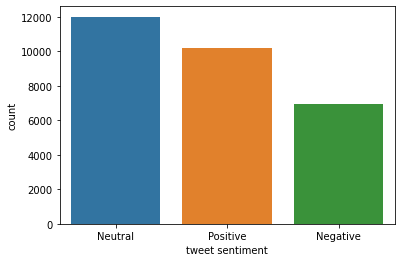

In [26]:
import seaborn as sns;
import matplotlib.pyplot as plt
class_names = ['Neutral', 'Positive', 'Negative']
ax = sns.countplot(df_vader.Analysis)
plt.xlabel('tweet sentiment')
ax.set_xticklabels(class_names);
plt.savefig('/content/drive/My Drive/256 project/Figures/tweet_sentiment_count.svg')

##Data PreProcessing

In [27]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
class_names=['Negative', 'Neutral', 'Positive']

In [29]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [30]:
from transformers import BertTokenizer
from torch.utils.data import Dataset,DataLoader

In [31]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [32]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [33]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [34]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [35]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [36]:
token_length = []

for txt in df_vader.clean_text:
  tokens = tokenizer.encode(txt, max_length=512,truncation=True)
  token_length.append(len(tokens))

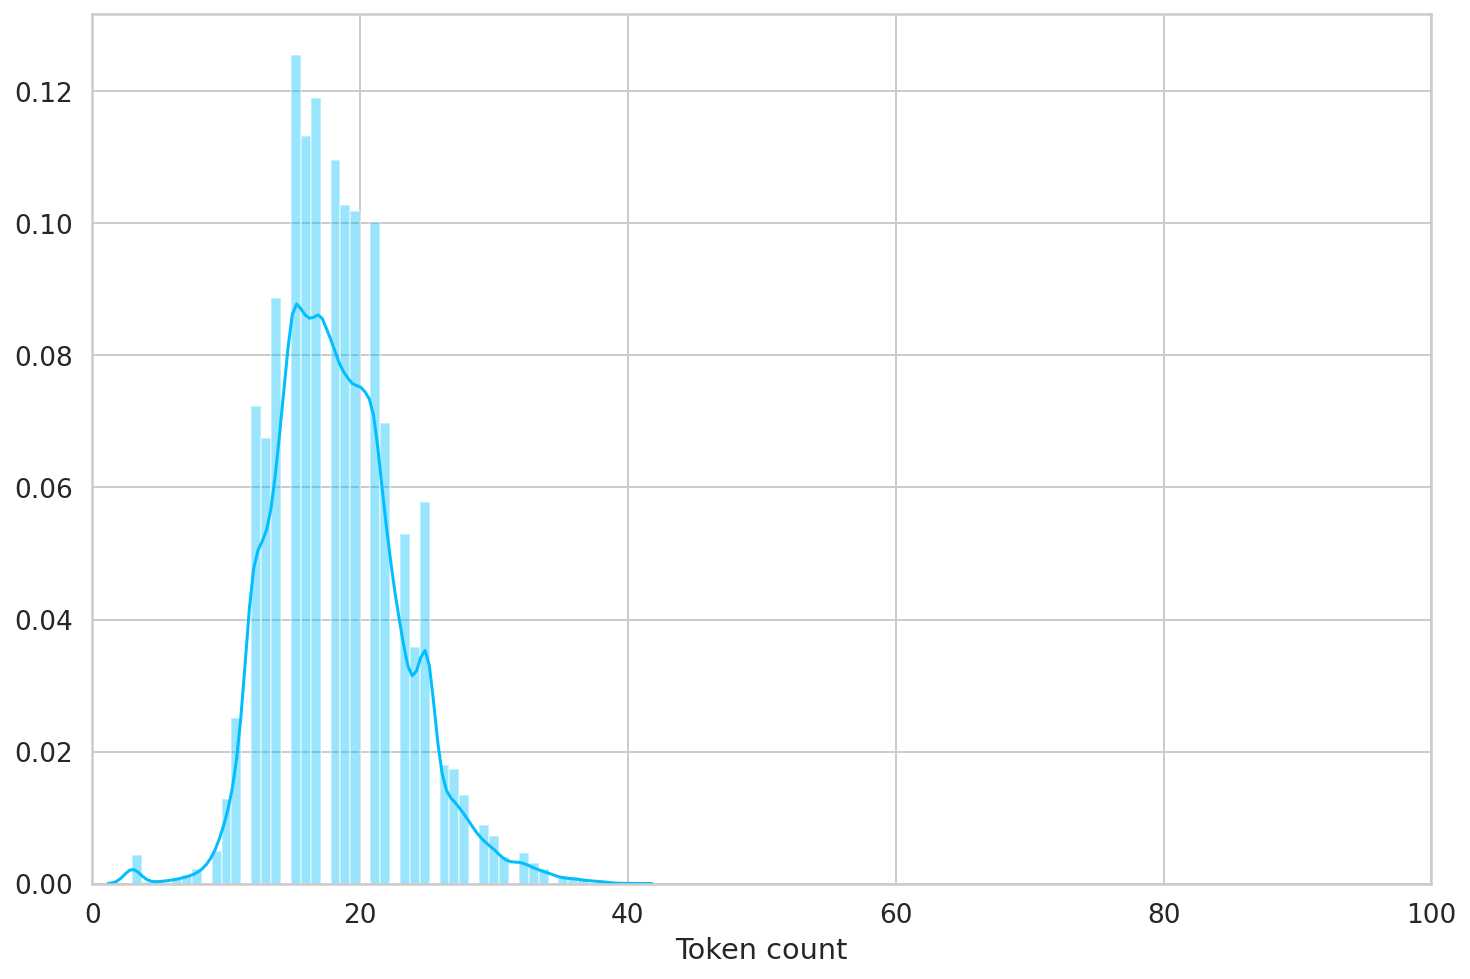

In [37]:
sns.distplot(token_length)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [38]:
MAX_LEN = 50

In [39]:
class TwitterDataset(Dataset):

  def __init__(self, tweets, targets, tokenizer, max_len):
    self.tweets = tweets
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.tweets)
  
  def __getitem__(self, item):
    input_ids = []
    attention_masks = []   


    tweet = str(self.tweets[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      tweet,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True
    )
    input_ids.append(encoding['input_ids'])
    attention_masks.append(encoding['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.FloatTensor(input_ids)
    attention_masks = torch.FloatTensor(attention_masks)

    return {
      'tweet_text': tweet,
      'input_ids': input_ids.flatten(),
      'attention_mask': attention_masks.flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [40]:
df_train, df_test = train_test_split(df_vader,test_size=0.2,random_state=RANDOM_SEED,shuffle=True,stratify=df_vader.target)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED,shuffle=True,stratify=df_test.target)

In [41]:
df_train,df_test, df_val = df_train.reset_index(drop=True), df_test.reset_index(drop=True),df_val.reset_index(drop=True)

In [42]:
df_train.shape, df_val.shape, df_test.shape

((23316, 7), (2914, 7), (2915, 7))

In [43]:
def create_data_loader(df,tokenizer,max_len,batch_size):
    data = TwitterDataset(
        tweets = df.clean_text,
        targets = df.target.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
      
    )

    return DataLoader(
        data,
        batch_size=batch_size,
        num_workers=0
    )

In [44]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [45]:
print(len(train_data_loader))

1458


In [46]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['tweet_text', 'input_ids', 'attention_mask', 'targets'])

In [47]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 50])
torch.Size([16, 50])
torch.Size([16])


##Sentiment Classification with BERT and Hugging Face

In [48]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [49]:
bert_model.config.hidden_size

768

In [50]:
class SentimentClassifier(nn.Module):

    def __init__(self,n_classes):
        super(SentimentClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size,n_classes)

    def forward(self,input_ids,attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        ) 
        output = self.drop(pooled_output)
        return self.out(output)

In [51]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [52]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 50])
torch.Size([16, 50])


In [53]:
F.softmax(model(input_ids.to(torch.int64),attention_mask.to(torch.int64)),dim=1)

tensor([[0.4834, 0.3116, 0.2051],
        [0.3208, 0.2915, 0.3877],
        [0.2878, 0.2800, 0.4322],
        [0.3856, 0.2498, 0.3646],
        [0.3826, 0.4031, 0.2144],
        [0.2989, 0.3001, 0.4010],
        [0.3971, 0.3010, 0.3019],
        [0.4031, 0.3057, 0.2913],
        [0.3927, 0.1513, 0.4559],
        [0.3492, 0.2625, 0.3883],
        [0.2918, 0.2813, 0.4269],
        [0.4001, 0.2137, 0.3862],
        [0.3188, 0.3144, 0.3667],
        [0.3055, 0.2557, 0.4388],
        [0.3399, 0.3027, 0.3574],
        [0.4134, 0.2264, 0.3603]], device='cuda:0', grad_fn=<SoftmaxBackward>)

##Training

In [55]:
EPOCHS=10

optimizer = AdamW(model.parameters(),lr=2e-5,correct_bias=False)
total_no_steps = len(train_data_loader)*EPOCHS

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_no_steps)

loss_fn = nn.CrossEntropyLoss().to(device)

In [56]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [60]:
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,num_examples):
    model = model.train()
    losses=[]
    correct_predictions=0
    i=0
    for d in data_loader:
      input_ids = d["input_ids"].to(torch.int64).to(device)
      attention_mask = d["attention_mask"].to(torch.int64).to(device)
      targets = d["targets"].to(device)

      outputs = model(
          input_ids=input_ids,
        attention_mask=attention_mask
      )
      
      _,preds = torch.max(outputs,dim=1)
      loss = loss_fn(outputs,targets)

      correct_predictions+=preds.eq(targets.data).sum()
      losses.append(loss.item())

      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(),max_norm=1.0)
      optimizer.step()
      scheduler.step()
      optimizer.zero_grad()
      i+=1
    return correct_predictions.double() / num_examples, np.mean(losses)



In [61]:
def eval_model(model,data_loader,loss_fn,device,num_examples):
    model = model.eval()

    losses=[]
    correct_predictions=0

    with torch.no_grad():
      for d in data_loader:
        input_ids = d["input_ids"].to(torch.int64).to(device)
        attention_mask = d["attention_mask"].to(torch.int64).to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _,preds = torch.max(outputs,dim=1)

        loss=loss_fn(outputs,targets)

        correct_predictions += preds.eq(targets.data).sum()
        losses.append(loss.item())
 
    return  correct_predictions.double() / num_examples, np.mean(losses)


In [62]:
model.cuda

<bound method Module.cuda of SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,),

In [63]:
params = list(model.named_parameters())
print(f'The BERT model has {len(params)} different named parameters.\n')
print('**** Embedding Layer ****\n')

for par in params[0:5]:
    print("{:<55} {:>12}".format(par[0], str(tuple(par[1].size()))))

print('\n**** First Transformer ****\n')

for par in params[5:21]:
    print("{:<55} {:>12}".format(par[0], str(tuple(par[1].size()))))

print('\n**** Output Layer ****\n')

for par in params[-4:]:
    print("{:<55} {:>12}".format(par[0], str(tuple(par[1].size()))))

The BERT model has 201 different named parameters.

**** Embedding Layer ****

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

**** First Transformer ****

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [64]:
%%time

history =defaultdict(list)
best_accuracy=0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-' * 10)

    train_acc,train_loss = train_epoch(model,train_data_loader,loss_fn,optimizer,device,scheduler,len(train_data_loader.dataset))

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc,val_loss = eval_model(model,val_data_loader,loss_fn,device,len(val_data_loader.dataset))
    print(f'Val loss {val_loss} accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), '/content/drive/My Drive/256 project/Sentiment Analysis/best_model_state.bin')
        best_accuracy = val_acc


Epoch 1/10
----------
Train loss 0.34770341252123066 accuracy 0.8748069994853319
Val loss 0.16854892777981328 accuracy 0.9547014413177762

Epoch 2/10
----------
Train loss 0.09901233949717352 accuracy 0.9766254932235374
Val loss 0.1398091076388497 accuracy 0.9722031571722718

Epoch 3/10
----------
Train loss 0.04791907655055311 accuracy 0.9897495282209641
Val loss 0.18191520066521846 accuracy 0.9711736444749485

Epoch 4/10
----------
Train loss 0.028533821666989853 accuracy 0.9943386515697374
Val loss 0.18038825715051188 accuracy 0.9728894989704873

Epoch 5/10
----------
Train loss 0.018355956813853488 accuracy 0.9964402127294562
Val loss 0.1907780881795146 accuracy 0.9722031571722718

Epoch 6/10
----------
Train loss 0.012449429703218187 accuracy 0.9976839938239834
Val loss 0.20984438815785672 accuracy 0.9739190116678106

Epoch 7/10
----------
Train loss 0.0076383981776826934 accuracy 0.9986704408989534
Val loss 0.19255672085096617 accuracy 0.9752916952642415

Epoch 8/10
----------
Tr

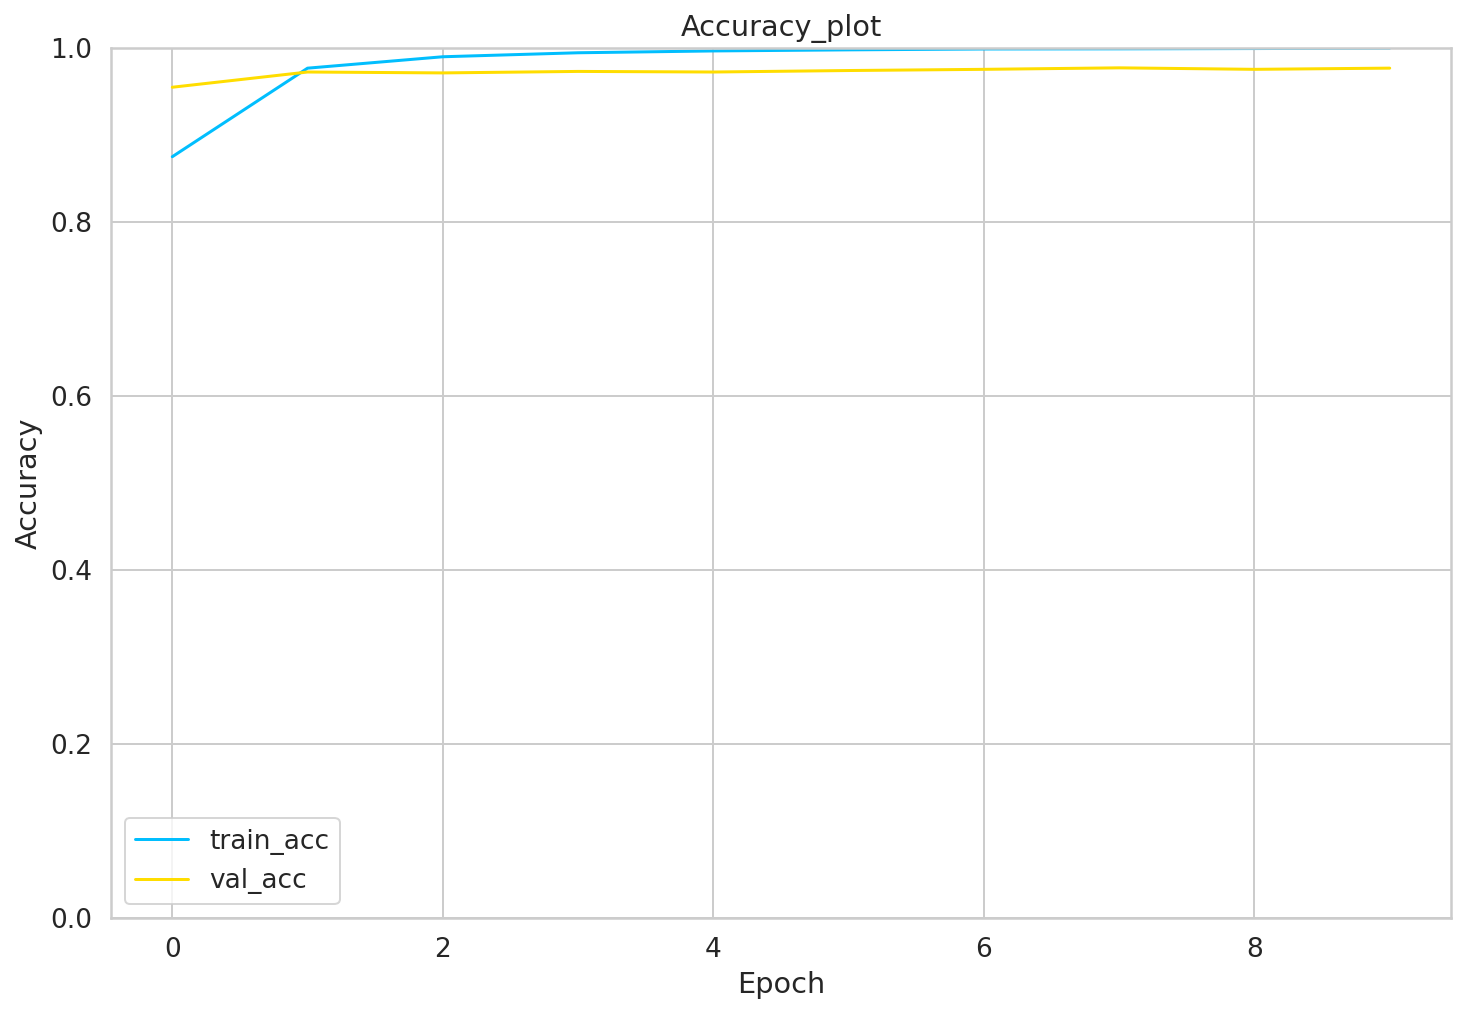

In [65]:
plt.plot(history['train_acc'], label='train_acc')
plt.plot(history['val_acc'],label='val_acc')
plt.title('Accuracy_plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0,1])
plt.savefig('/content/drive/My Drive/256 project/Figures/accuracyplot.svg')

##Evaluation

In [66]:
test_acc,_ = eval_model(model,test_data_loader,loss_fn,device,len(test_data_loader.dataset))
test_acc.item()

0.9725557461406518

In [69]:
def get_predictions(model,data_loader):
    model = model.eval()

    tweets_texts=[]
    predictions=[]
    predictions_probs=[]
    true_values=[]

    with torch.no_grad():
      for d in data_loader:
          texts=d['tweet_text']
          input_ids = d['input_ids'].to(torch.int64).to(device)
          attention_mask = d["attention_mask"].to(torch.int64).to(device)
          targets = d['targets'].to(device)

          outputs=model(
              input_ids=input_ids,
              attention_mask=attention_mask
          )

          _,preds = torch.max(outputs,dim=1)

          tweets_texts.extend(texts)
          predictions.extend(preds)
          predictions_probs.extend(outputs)
          true_values.extend(targets)

      predictions = torch.stack(predictions).cpu()
      predictions_probs = torch.stack(predictions_probs).cpu()
      true_values = torch.stack(true_values).cpu()
      return tweets_texts,predictions, predictions_probs, true_values

In [70]:
y_tweets_texts,y_pred,y_pred_probs,y_test=get_predictions(model,test_data_loader)

In [71]:
print(y_pred)
print(y_test)
print(y_pred_probs)

tensor([0, 2, 1,  ..., 0, 1, 0])
tensor([0, 2, 1,  ..., 0, 1, 0])
tensor([[ 7.4157, -4.4494, -2.4618],
        [-3.5938, -3.6156,  8.1886],
        [-4.1535,  8.0557, -3.6430],
        ...,
        [ 7.4897, -4.4263, -2.6749],
        [-4.5399,  7.6114, -3.0854],
        [ 7.4683, -3.7314, -3.3012]])


In [72]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96       696
     Neutral       0.98      0.98      0.98      1201
    Positive       0.97      0.98      0.97      1018

    accuracy                           0.97      2915
   macro avg       0.97      0.97      0.97      2915
weighted avg       0.97      0.97      0.97      2915



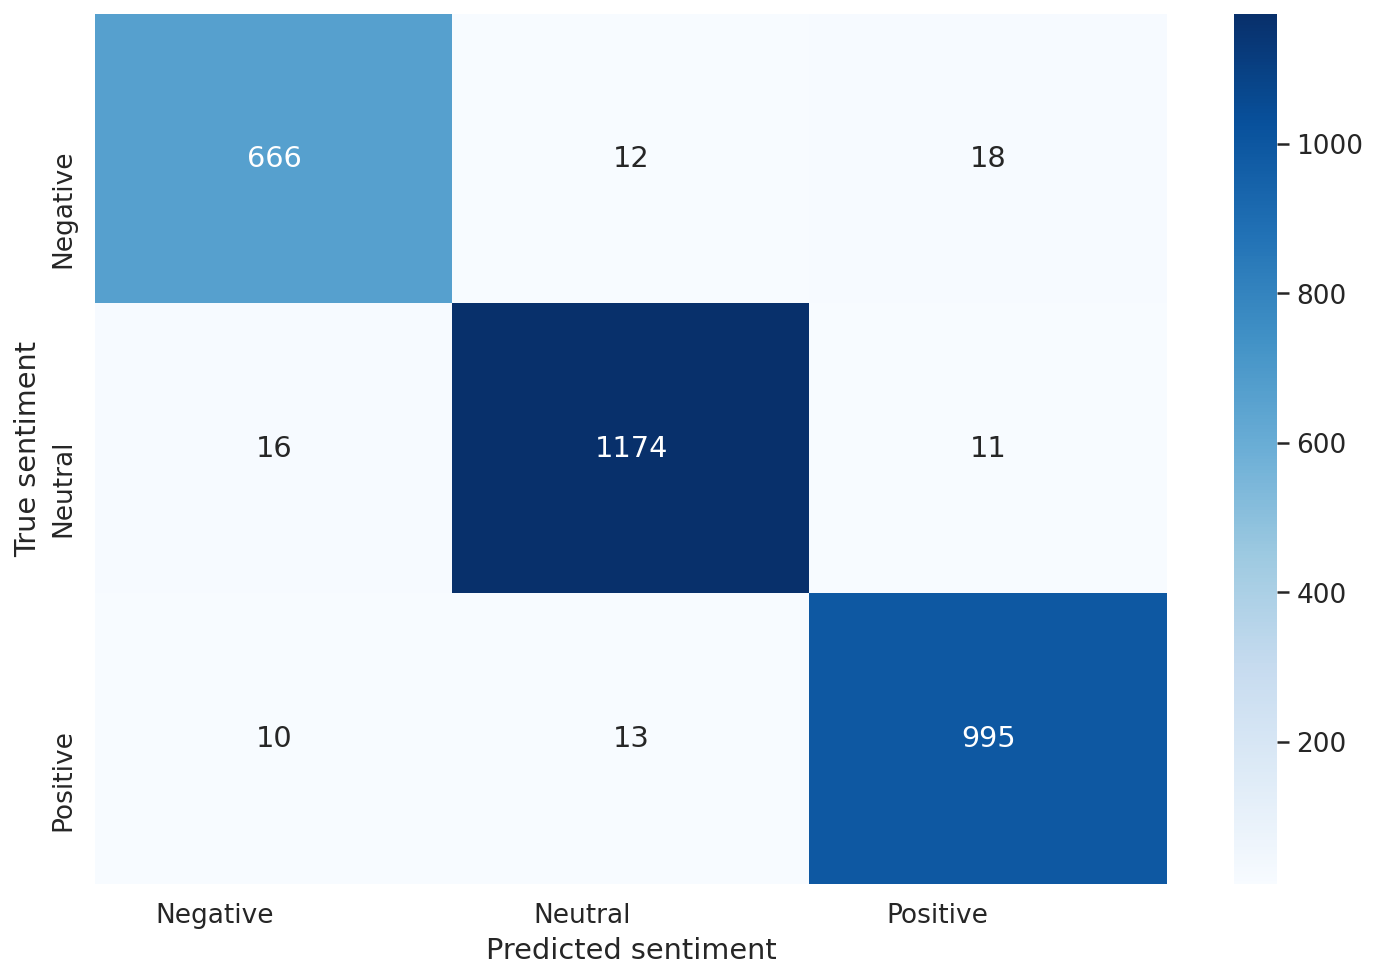

In [73]:
def show_confusion_matrix(confusion_matrix):
  heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right')
  plt.xlabel('Predicted sentiment');
  plt.ylabel('True sentiment')
cm = confusion_matrix(y_test, y_pred)
dfvader_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(dfvader_cm)
plt.savefig('/content/drive/My Drive/256 project/Figures/confusionmatrix.svg')

In [74]:
import random
idx = 19

for i in range(25):
    idx = random.randint(0,len(test_data_loader.dataset))
    tweet_text = y_tweets_texts[idx]
    true_sentiment = y_test[idx]
    pred_sentiment = y_pred[idx]
    print(f'Index: {idx}')
    print("\n".join(wrap(tweet_text)))
    print(f'True sentiment: {class_names[true_sentiment]}')
    print(f'Pred sentiment: {class_names[pred_sentiment]}')
    print()

Index: 1369
callout people whore trying live chronicpain coronavirusif experience
persistant pain amp
True sentiment: Negative
Pred sentiment: Negative

Index: 193
publichealth england woefully misleading exaggerated death statistics
scandal fed fear mad
True sentiment: Negative
Pred sentiment: Negative

Index: 2905
miss days coronavirus pandemiclearn new expression describes
True sentiment: Negative
Pred sentiment: Negative

Index: 2499
indiana school forced quarantines students child contracts covid19
first day school thesource covid19
True sentiment: Negative
Pred sentiment: Negative

Index: 714
simple common sense wearing facial maskmt socialdistancing coronavirus
covid19 health covid19 wfh
True sentiment: Neutral
Pred sentiment: Neutral

Index: 642
exams2020 covid19 india10 days lockdown declared puneother
citiesstates may declared various lockdo
True sentiment: Neutral
Pred sentiment: Neutral

Index: 1048
democratic group warns unprepared distribute covid19 vaccine via
True senti